In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import pandas as pd
import numpy as np

In [202]:
file_path = "/content/drive/MyDrive/Dataset/DA/HW3/breast-cancer-wisconsin.csv"

df_data = pd.read_csv(file_path, header=None, names = ['ID', 'x0', 'x1', 'x2', 'x3','x4','x5','x6','x7', 'x8', 'Label'])


In [223]:
df_data.dropna()

df_train_data = df_data.iloc[:400, 1:-1]
df_test_data = df_data.iloc[400:,1:-1]


train_data = df_train_data.values
test_data = df_test_data.values

train_label = df_data.iloc[0:400, 10].values
test_label = df_data.iloc[400:,10].values

train_label = (train_label/2) -1
test_label = (test_label/2) -1

print(train_data.shape)

print(train_data)


(400, 9)
[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [10 10 10 ...  8  5  1]
 [ 5  1  2 ...  3  1  1]
 [ 8  5  6 ...  6  6  1]]


# **Functions to calculate Miss Classification Rate and RMS margin**

In [204]:
def miss_classification_rate(test_pred):
  comparison = np.equal(test_label, test_pred)
  MCR = 1 - np.count_nonzero(comparison)/test_data.shape[0]

  return MCR, comparison

def RMS_func(correct_classified_prob):
  M_c = correct_classified_prob.shape[0]
  RMS = np.sqrt(((1/M_c) * np.sum( (correct_classified_prob-0.5)**2) ) )

  return RMS



# **Function to Calculate Weighted Cost**

In [205]:
# Weighted cost

def weighted_cost(comp_ar):
  
  incorrect_indices = np.where(comp_ar == 0)[0]
  cost = 0.0

  for i in incorrect_indices:

    if (test_label[i]==0):
      cost += 1.0
    else:
      cost += 100.0

  return cost * (1/6916)


# **Question 1 (a) Logistic Regression**

In [206]:

# helpful functions

# X is the train data
# w is the weight vector

def sigmoid(X, w):
  return 1/(1 + np.exp(-np.linalg.multi_dot([w,X.T])))

# X is the array containing train data
# C is the ground truth class label
# w is the updated weight vector

def loss_func(X,C, w):
  Y = sigmoid(X, w)
  cross_entropy_loss = - np.sum((C * np.log(Y) + (1-C)* np.log(1 - Y)))

  return cross_entropy_loss

In [207]:
#defining parameters

max_iter = 1000

#step_size
eta = 0.001


# X is train data
# C is train labels

def train(X,C):
  
  #initialize weight vector (w)
  w = np.zeros([1,10])
  X = np.append(X, np.ones([400,1]), axis = 1)
  #w = np.random.normal(0, 1, size=(1, 9))

  loss = []
  for i in range(max_iter):
    Y = sigmoid(X, w)
    temp = Y - C
    delta_E = np.linalg.multi_dot([temp, X])

    w = w - eta * delta_E

    loss.append(loss_func(X,C,w))

    if ( abs(loss[i] - loss[i-1]) < 0.001 and i > 100 ):
      break

  return loss, w

def predict(X, w):
  X = np.append(X, np.ones([283,1]), axis = 1)
  prediction = np.linalg.multi_dot([w,X.T]).squeeze()
  C_hat = []

  for p in prediction:
    
    if (p >=0):
      C_hat.append(1)
    else:
      C_hat.append(0)
    
  return C_hat


loss_ , w = train(train_data, train_label)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


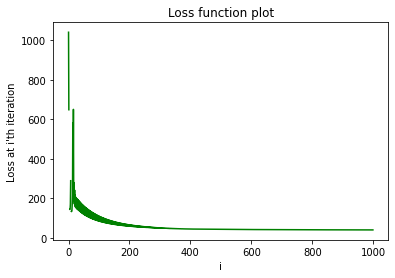

In [208]:
import matplotlib.pyplot as plt

x = range(0,len(loss_))
y = loss_

plt.plot(x, y, color='g')

# naming the x axis
plt.xlabel('i')
# naming the y axis
plt.ylabel("Loss at i'th iteration")
 
# giving a title to my graph
plt.title('Loss function plot')
 
# function to show the plot
plt.show()


**Calculating MCR, RMS and Weighted Cost for Logistic Regression**

In [209]:
C_hat = predict(test_data, w)
C_hat = np.array(C_hat)

MCR_LR, comparison_LR = miss_classification_rate(C_hat)

print("Number of miss classified instances: ", 283 - np.count_nonzero(comparison_LR))
print()
print("Miss Classified Rate: ", MCR_LR)
print()

# Calculating RMS

prob_LR = sigmoid(np.append(test_data, np.ones([283,1]), axis = 1), w).squeeze()
correct_classified_prob_LR = prob_LR[comparison_LR]

RMS_LR = RMS_func(correct_classified_prob_LR)
print("RMS margin for LR: ", RMS_LR)

# """*** Weighted Cost of Logistic Regression***"""
print()
weighted_cost_LR = weighted_cost(comparison_LR)

print("***** Weighted Cost of LR *****\n")
print(weighted_cost_LR)


Number of miss classified instances:  3

Miss Classified Rate:  0.010600706713780883

RMS margin for LR:  0.46687549965023

***** Weighted Cost of LR *****

0.01474840948525159


# **Question 1 (b) KNN classifier**

----- 1  Neighbours -----

Number of miss classification :  5
MCR :  0.017667844522968212
Weighted Cost :  0.015037593984962405

----- 2  Neighbours -----

Number of miss classification :  8
MCR :  0.028268551236749095
Weighted Cost :  0.08704453441295545

----- 3  Neighbours -----

Number of miss classification :  4
MCR :  0.014134275618374548
Weighted Cost :  0.000578368999421631

----- 4  Neighbours -----

Number of miss classification :  5
MCR :  0.017667844522968212
Weighted Cost :  0.029352226720647773

----- 5  Neighbours -----

Number of miss classification :  5
MCR :  0.017667844522968212
Weighted Cost :  0.015037593984962405

----- 6  Neighbours -----

Number of miss classification :  3
MCR :  0.010600706713780883
Weighted Cost :  0.01474840948525159

----- 7  Neighbours -----

Number of miss classification :  4
MCR :  0.014134275618374548
Weighted Cost :  0.014893001735106997

----- 8  Neighbours -----

Number of miss classification :  3
MCR :  0.010600706713780883
Weighted 

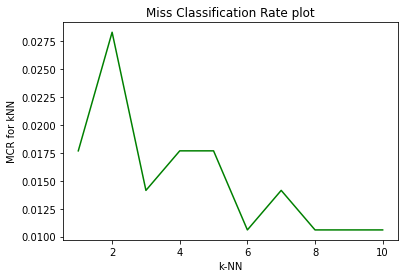

In [210]:
from sklearn.neighbors import KNeighborsClassifier
MCR_knn = []
number_miss_clsf_KNN = []
weighted_cost_KNN = []

for k in range(10):
    
    classifier_knn = KNeighborsClassifier(n_neighbors=k+1)
    classifier_knn.fit(train_data, train_label)

    test_pred_knn = classifier_knn.predict(test_data)
    mcr_ , comparison_KNN = miss_classification_rate(test_pred_knn)
    MCR_knn.append(mcr_)

    number_miss_clsf_KNN.append(283 - np.count_nonzero(comparison_KNN))

    print("-----", k+1 , " Neighbours -----")
    print()
    print("Number of miss classification : ", number_miss_clsf_KNN[k])
    print("MCR : ", mcr_)


    # """*** Weighted Cost KNN***"""

    weighted_cost_KNN.append(weighted_cost(comparison_KNN))

    print("Weighted Cost : ", weighted_cost_KNN[k])
    
    print()



import matplotlib.pyplot as plt

x = range(1,len(MCR_knn)+1)
y = MCR_knn

plt.plot(x, y, color='g')

# naming the x axis
plt.xlabel('k-NN')
# naming the y axis
plt.ylabel("MCR for kNN")
 
# giving a title to my graph
plt.title('Miss Classification Rate plot')
 
# function to show the plot
plt.show()


# **Question 1 (c) LDA**

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

MCR_LDA = []

lda = LDA()
lda.fit(train_data, train_label)
test_pred_LDA = lda.predict(test_data)

MCR_LDA, comparison_LDA = miss_classification_rate(test_pred_LDA)

print("Number of Miss Classification using LDA: ", 283 - np.count_nonzero(comparison_LDA))
print()
print("Miss classification rate for LDA : ", MCR_LDA)


# """*** Weighted Cost LDA***"""
print()
weighted_cost_LDA = weighted_cost(comparison_LDA)

print("***** Weighted Cost of LDA *****\n")
print(weighted_cost_LDA)



Number of Miss Classification using LDA:  5

Miss classification rate for LDA :  0.017667844522968212

***** Weighted Cost of LDA *****

0.0579814921920185


# **Question 1 (d) SVM**

**SVM 'linear' kernel**

In [212]:
from sklearn.svm import SVC

classifier_svm_lin = SVC(kernel='linear', probability=True)

classifier_svm_lin.fit(train_data, train_label)

test_pred_SVM_lin = classifier_svm_lin.predict(test_data)

MCR_SVM_lin, comparison_SVM_lin = miss_classification_rate(test_pred_SVM_lin)

print("Number of Miss Classification using SVM (linear kernel): ", 283 - np.count_nonzero(comparison_SVM_lin))
print()
print("Miss classification rate for SVM (linear kernel) : ", MCR_SVM_lin)


# Calculating RMS

test_pred_prob_SVM_lin = classifier_svm_lin.predict_proba(test_data)
correct_classified_prob_SVM_lin = test_pred_prob_SVM_lin[:,1][comparison_SVM_lin]
print()
RMS_SVM_lin = RMS_func(correct_classified_prob_SVM_lin)
print("RMS for SVM (linear kernel) : ", RMS_SVM_lin)


# """*** Weighted Cost SVM Linear Kernel***"""
print()
weighted_cost_SVM_lin = weighted_cost(comparison_SVM_lin)

print("***** Weighted Cost of SVM Linear Kernel *****\n")
print(weighted_cost_SVM_lin)

Number of Miss Classification using SVM (linear kernel):  4

Miss classification rate for SVM (linear kernel) :  0.014134275618374548

RMS for SVM (linear kernel) :  0.4489134080884756

***** Weighted Cost of SVM Linear Kernel *****

0.014893001735106997


**SVM 'poly' kernel**

In [213]:

classifier_SVM_poly = []
test_pred_SVM_poly = []
weighted_cost_SVM_poly = []
MCR_SVM_poly = []
RMS_SVM_poly = []

classifier_SVM_poly.append(None)
classifier_SVM_poly.append(None)

test_pred_SVM_poly.append(None)
test_pred_SVM_poly.append(None)

for degree_ in range (2,6):

  classifier_SVM_poly.append(SVC(kernel='poly', degree=degree_, probability=True))
  classifier_SVM_poly[degree_].fit(train_data, train_label)
  test_pred_SVM_poly.append(classifier_SVM_poly[degree_].predict(test_data))
  
  MCR_SVM_poly_, comparison_SVM_poly = miss_classification_rate(test_pred_SVM_lin)
  MCR_SVM_poly.append(MCR_SVM_poly_)
  
  
  print("-----Poly Kernel with Degree:", degree_, "-----")
  print()
  print("Number of Miss Classification : "  ,  283 - np.count_nonzero(comparison_SVM_poly))
  print("Miss classification rate (MCR): ", MCR_SVM_poly)

  test_pred_prob_SVM_poly = classifier_SVM_poly[degree_].predict_proba(test_data)
  correct_classified_prob_SVM_poly = test_pred_prob_SVM_poly[:,1][comparison_SVM_poly]
  RMS_SVM_poly.append(RMS_func(correct_classified_prob_SVM_poly))
  print("RMS for SVM : ", RMS_SVM_poly[degree_-2])

  # """*** Weighted Cost SVM Poly Kernel***"""
  print()

  weighted_cost_SVM_poly.append(weighted_cost(comparison_SVM_poly))

  print("***** Weighted Cost of SVM Poly Kernel *****\n")
  print(weighted_cost_SVM_poly[degree_-2])
  
  print()


-----Poly Kernel with Degree: 2 -----

Number of Miss Classification :  4
Miss classification rate (MCR):  [0.014134275618374548]
RMS for SVM :  0.46445571191638607

***** Weighted Cost of SVM Poly Kernel *****

0.014893001735106997

-----Poly Kernel with Degree: 3 -----

Number of Miss Classification :  4
Miss classification rate (MCR):  [0.014134275618374548, 0.014134275618374548]
RMS for SVM :  0.44386200387870584

***** Weighted Cost of SVM Poly Kernel *****

0.014893001735106997

-----Poly Kernel with Degree: 4 -----

Number of Miss Classification :  4
Miss classification rate (MCR):  [0.014134275618374548, 0.014134275618374548, 0.014134275618374548]
RMS for SVM :  0.40184476704012206

***** Weighted Cost of SVM Poly Kernel *****

0.014893001735106997

-----Poly Kernel with Degree: 5 -----

Number of Miss Classification :  4
Miss classification rate (MCR):  [0.014134275618374548, 0.014134275618374548, 0.014134275618374548, 0.014134275618374548]
RMS for SVM :  0.3674036487154804

*

**SVM with 'rbf' kernel**

In [214]:

classifier_svm_rbf = SVC(kernel='rbf', probability=True)

classifier_svm_rbf.fit(train_data, train_label)

test_pred_SVM_rbf = classifier_svm_rbf.predict(test_data)

MCR_SVM_rbf, comparison_SVM_rbf = miss_classification_rate(test_pred_SVM_rbf)

print("Number of Miss Classification of SVM (rbf kernel): ", 283 - np.count_nonzero(comparison_SVM_rbf))
print()
print("Miss classification rate (MCR) (rbf kernel) : ", MCR_SVM_rbf)

# Calculating RMS

test_pred_prob_SVM_rbf = classifier_svm_rbf.predict_proba(test_data)
correct_classified_prob_SVM_rbf = test_pred_prob_SVM_rbf[:,1][comparison_SVM_rbf]
print()
RMS_SVM_rbf = RMS_func(correct_classified_prob_SVM_rbf)
print("RMS for SVM (rbf kernel) : ", RMS_SVM_rbf)

# """*** Weighted Cost SVM RBF Kernel***"""
print()
weighted_cost_SVM_rbf = weighted_cost(comparison_SVM_rbf)

print("***** Weighted Cost of SVM RBF Kernel *****\n")
print(weighted_cost_SVM_rbf)

Number of Miss Classification of SVM (rbf kernel):  5

Miss classification rate (MCR) (rbf kernel) :  0.017667844522968212

RMS for SVM (rbf kernel) :  0.4712341647261002

***** Weighted Cost of SVM RBF Kernel *****

0.015037593984962405


**SVM with 'sigmoid' kernel**

In [215]:

classifier_svm_sig = SVC(kernel='sigmoid', probability=True)

classifier_svm_sig.fit(train_data, train_label)

test_pred_SVM_sig = classifier_svm_rbf.predict(test_data)

MCR_SVM_sig, comparison_SVM_sig = miss_classification_rate(test_pred_SVM_sig)

print("Number of Miss Classification of SVM (sigmoid kernel): ", 283 - np.count_nonzero(comparison_SVM_sig))
print()
print("Miss classification rate (MCR) (sigmoid kernel) : ", MCR_SVM_sig)

# Calculating RMS

test_pred_prob_SVM_sig = classifier_svm_rbf.predict_proba(test_data)
correct_classified_prob_SVM_sig = test_pred_prob_SVM_sig[:,1][comparison_SVM_sig]
print()
RMS_SVM_sig = RMS_func(correct_classified_prob_SVM_sig)
print("RMS for SVM (sigmoid kernel) : ", RMS_SVM_sig)

# """*** Weighted Cost SVM Sigmoid Kernel***"""
print()
weighted_cost_SVM_sig = weighted_cost(comparison_SVM_sig)

print("***** Weighted Cost of SVM Sigmoid Kernel *****\n")
print(weighted_cost_SVM_sig)

Number of Miss Classification of SVM (sigmoid kernel):  5

Miss classification rate (MCR) (sigmoid kernel) :  0.017667844522968212

RMS for SVM (sigmoid kernel) :  0.4712341647261002

***** Weighted Cost of SVM Sigmoid Kernel *****

0.015037593984962405


# **RMS Comparison between LR and SVM**

Comparing the RMS margin of *part a* and *part d* we can see that the RMS margin of the SVM 'rbf' kernel is just a bit better than that of the others.

Here we are calculating RMS margin which measures how confident is my classifier about the decision that it has made. So the higher the better.


In [216]:
print("***RMS of Logistic Regression***")
print(RMS_LR)
print()

print("***RMS of SVM Linear Kernel***")
print(RMS_SVM_lin)
print()

print("***RMS of SVM Poly Kernel***")
print(RMS_SVM_poly)
print()

print("***RMS of SVM RBF Kernel***")
print(RMS_SVM_rbf)
print()


print("***RMS of SVM Sigmoid Kernel***")
print(RMS_SVM_sig)
print()


***RMS of Logistic Regression***
0.46687549965023

***RMS of SVM Linear Kernel***
0.4489134080884756

***RMS of SVM Poly Kernel***
[0.46445571191638607, 0.44386200387870584, 0.40184476704012206, 0.3674036487154804]

***RMS of SVM RBF Kernel***
0.4712341647261002

***RMS of SVM Sigmoid Kernel***
0.4712341647261002



# **Question 1 (e) Decision Tree**

-----DT with max depth 3 -----

Number of Miss Classification :  10
Miss classification rate (MCR):  0.035335689045936425

***** Weighted Cost of DT *****

0.0579814921920185

-----DT with max depth 4 -----

Number of Miss Classification :  7
Miss classification rate (MCR):  0.02473498233215543

***** Weighted Cost of DT *****

0.0579814921920185

-----DT with max depth 5 -----

Number of Miss Classification :  8
Miss classification rate (MCR):  0.028268551236749095

***** Weighted Cost of DT *****

0.0579814921920185

-----DT with max depth 6 -----

Number of Miss Classification :  9
Miss classification rate (MCR):  0.03180212014134276

***** Weighted Cost of DT *****

0.0579814921920185

-----DT with max depth 7 -----

Number of Miss Classification :  12
Miss classification rate (MCR):  0.04240282685512364

***** Weighted Cost of DT *****

0.0579814921920185

-----DT with max depth 8 -----

Number of Miss Classification :  12
Miss classification rate (MCR):  0.04240282685512364

****

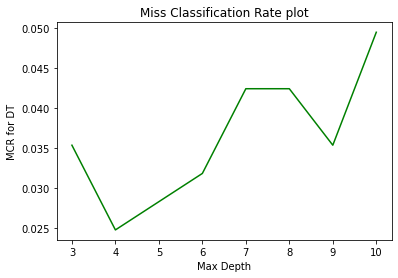

In [217]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz 

decision_tree = []
MCR_DT = []
weighted_cost_DT = []

decision_tree.append(None)
decision_tree.append(None)
decision_tree.append(None)


for max_depth_ in range(3,11):
  decision_tree_ = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_)
  decision_tree_.fit(train_data, train_label)
  decision_tree.append(decision_tree_)

  test_pred_DT = decision_tree_.predict(test_data)

  mcr_DT , comparison_DT = miss_classification_rate(test_pred_DT)
  MCR_DT.append(mcr_DT)

  print("-----DT with max depth", max_depth_, "-----")
  print()
  print("Number of Miss Classification : "  ,  283 - np.count_nonzero(comparison_DT))
  print("Miss classification rate (MCR): ", mcr_DT)
  print()

  # """*** Weighted Cost DT***"""
  weighted_cost_DT.append(weighted_cost(comparison_LDA)) 

  print("***** Weighted Cost of DT *****\n")
  print(weighted_cost_DT[max_depth_-3])
  print()


x = range(3,11)
y = MCR_DT

plt.plot(x, y, color='g')

# naming the x axis
plt.xlabel('Max Depth')
# naming the y axis
plt.ylabel("MCR for DT")
 
# giving a title to my graph
plt.title('Miss Classification Rate plot')
 
# function to show the plot
plt.show()


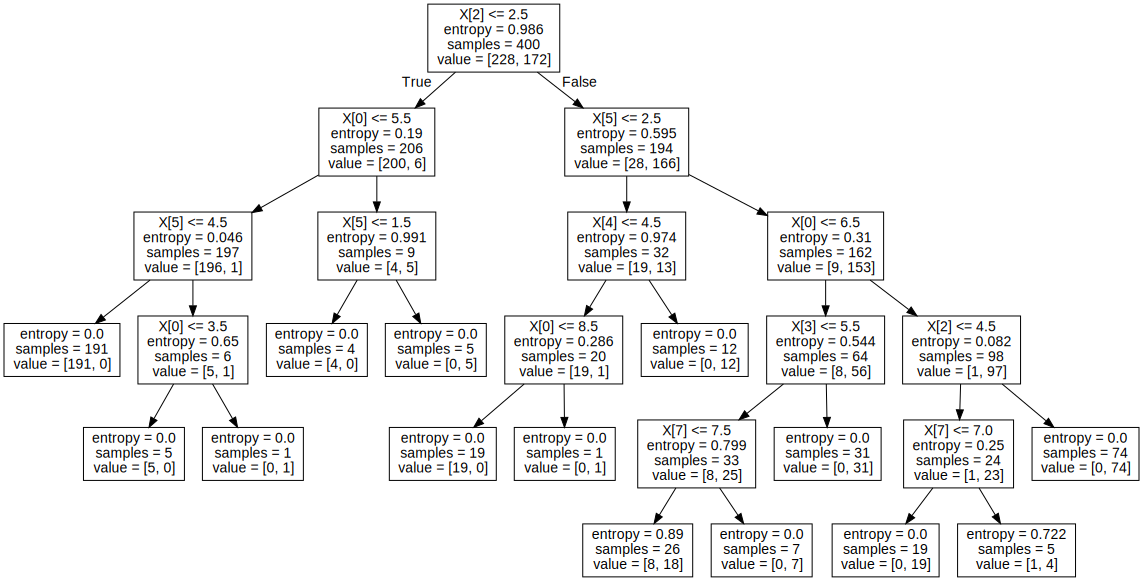

In [218]:
graph_data = tree.export_graphviz(decision_tree[5], out_file=None) 
graph = graphviz.Source(graph_data) 
graph.render("Breast Cancer")
graph

# **Question 1 (f) AdaBoost, XGBoost and Random Forest**

**Adaboost**

In [219]:
from sklearn.ensemble import AdaBoostClassifier

classifier_ADB = []
MCR_ADB = []
weighted_cost_ADB = []

for   wl in [100,200,300,400,500]:
  classifier_ADB_ = AdaBoostClassifier(n_estimators=wl)
  classifier_ADB_.fit(train_data,train_label)
  classifier_ADB.append(classifier_ADB_)

  test_pred_ADB = classifier_ADB_.predict(test_data)

  mcr_ADB , comparison_ADB = miss_classification_rate(test_pred_ADB)
  MCR_ADB.append(mcr_ADB)

  print("-----AdaBoost with", wl , " weak learnners-----")
  print()
  print("Number of Miss Classification : "  ,  283 - np.count_nonzero(comparison_ADB))
  print("Miss classification rate (MCR): ", mcr_ADB)
  print()

  # """*** Weighted Cost ADB***"""
  weighted_cost_ADB.append(weighted_cost(comparison_ADB)) 

  print("***** Weighted Cost of ADB *****\n")
  print(weighted_cost_ADB[int(wl/100)-1])
  print()

-----AdaBoost with 100  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of ADB *****

0.10179294389820705

-----AdaBoost with 200  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of ADB *****

0.10179294389820705

-----AdaBoost with 300  weak learnners-----

Number of Miss Classification :  14
Miss classification rate (MCR):  0.04946996466431097

***** Weighted Cost of ADB *****

0.14517061885482938

-----AdaBoost with 400  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of ADB *****

0.10179294389820705

-----AdaBoost with 500  weak learnners-----

Number of Miss Classification :  12
Miss classification rate (MCR):  0.04240282685512364

***** Weighted Cost of ADB *****

0.11625216888374783



**XGBoost Classifier**

In [220]:
from xgboost.sklearn import XGBClassifier

classifier_XGB = []
MCR_XGB = []
weighted_cost_XGB = []

for   wl in [100,200,300,400,500]:
  classifier_XGB_ = AdaBoostClassifier(n_estimators=wl)
  classifier_XGB_.fit(train_data,train_label)
  classifier_XGB.append(classifier_XGB_)

  test_pred_XGB = classifier_XGB_.predict(test_data)

  mcr_XGB , comparison_XGB = miss_classification_rate(test_pred_XGB)
  MCR_XGB.append(mcr_XGB)

  print("-----XGboost with", wl , " weak learnners-----")
  print()
  print("Number of Miss Classification : "  ,  283 - np.count_nonzero(comparison_XGB))
  print("Miss classification rate (MCR): ", mcr_XGB)
  print()

  # """*** Weighted Cost XGB***"""
  weighted_cost_XGB.append(weighted_cost(comparison_XGB)) 

  print("***** Weighted Cost of XGB *****\n")
  print(weighted_cost_XGB[int(wl/100)-1])
  print()


-----XGboost with 100  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of XGB *****

0.10179294389820705

-----XGboost with 200  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of XGB *****

0.10179294389820705

-----XGboost with 300  weak learnners-----

Number of Miss Classification :  14
Miss classification rate (MCR):  0.04946996466431097

***** Weighted Cost of XGB *****

0.14517061885482938

-----XGboost with 400  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of XGB *****

0.10179294389820705

-----XGboost with 500  weak learnners-----

Number of Miss Classification :  12
Miss classification rate (MCR):  0.04240282685512364

***** Weighted Cost of XGB *****

0.11625216888374783



**Random Forest Classifier**

In [221]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF = []
MCR_RF = []
weighted_cost_RF = []

for   wl in [100,200,300,400,500]:
  classifier_RF_ = AdaBoostClassifier(n_estimators=wl)
  classifier_RF_.fit(train_data,train_label)
  classifier_RF.append(classifier_RF_)

  test_pred_RF = classifier_RF_.predict(test_data)

  mcr_RF , comparison_RF = miss_classification_rate(test_pred_RF)
  MCR_RF.append(mcr_RF)

  print("-----Random Forrest with", wl , " weak learnners-----")
  print()
  print("Number of Miss Classification : "  ,  283 - np.count_nonzero(comparison_RF))
  print("Miss classification rate (MCR): ", mcr_RF)
  print()

  # """*** Weighted Cost RF***"""
  weighted_cost_RF.append(weighted_cost(comparison_RF)) 

  print("***** Weighted Cost of RF *****\n")
  print(weighted_cost_RF[int(wl/100)-1])
  print()

-----Random Forrest with 100  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of RF *****

0.10179294389820705

-----Random Forrest with 200  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of RF *****

0.10179294389820705

-----Random Forrest with 300  weak learnners-----

Number of Miss Classification :  14
Miss classification rate (MCR):  0.04946996466431097

***** Weighted Cost of RF *****

0.14517061885482938

-----Random Forrest with 400  weak learnners-----

Number of Miss Classification :  11
Miss classification rate (MCR):  0.03886925795053009

***** Weighted Cost of RF *****

0.10179294389820705

-----Random Forrest with 500  weak learnners-----

Number of Miss Classification :  12
Miss classification rate (MCR):  0.04240282685512364

***** Weighted Cost of RF *****

0.11625216888374783



# **Question 1 (f) Weighted Cost**

In terms of **Miss Classification Rate (MCR)** Logistic Regression and kNN classifier with 6,8,9 and 10 nearest neighbour performs the best. With *MCR=0.010600706713780883* where only 3 test data were mis-classified.


```

```



In terms of **Weighted Cost** kNN classifier with *k=3* is the best with weighted cost = 0.000578368999421631. So it misclassified 5 healty instances.

In [222]:
print("***Logistic Regression***")
print("MCR : ", MCR_LR, "\nWeighted Cost : ", weighted_cost_LR)
print()

print("***KNN***")
print("MCR : ", MCR_knn)
print("Weighted Cost : ", weighted_cost_KNN)
print()

print("***LDA***")
print("MCR : ", MCR_LDA)
print("Weighted Cost : " , weighted_cost_LDA)
print()

print("***SVM Linear***")
print("MCR : ", MCR_SVM_lin)
print("Weighted Cost : ", weighted_cost_SVM_lin)
print()

print("***SVM Poly***")
print("MCR : ", MCR_SVM_poly)
print("Weighted Cost : ", weighted_cost_SVM_poly)
print()

print("***SVM RBF***")
print("MCR : ", MCR_SVM_rbf)
print("Weighted Cost : ", weighted_cost_SVM_rbf)
print()

print("***SVM Sigmoid***")
print("MCR : ", MCR_SVM_sig)
print("Weighted Cost : ", weighted_cost_SVM_sig)
print()

print("***Decision Tree***")
print("MCR : ", MCR_DT)
print("Weighted Cost : ", weighted_cost_DT)
print()

print("***AdaBoost***")
print("MCR : ", MCR_ADB)
print("Weighted Cost : ", weighted_cost_ADB)
print()

print("***XGBoost***")
print("MCR : ", MCR_XGB)
print("Weighted Cost : ", weighted_cost_XGB)
print()

print("***Random Forest***")
print("MCR : ", MCR_RF)
print("Weighted Cost : ", weighted_cost_RF)
print()



***Logistic Regression***
MCR :  0.010600706713780883 
Weighted Cost :  0.01474840948525159

***KNN***
MCR :  [0.017667844522968212, 0.028268551236749095, 0.014134275618374548, 0.017667844522968212, 0.017667844522968212, 0.010600706713780883, 0.014134275618374548, 0.010600706713780883, 0.010600706713780883, 0.010600706713780883]
Weighted Cost :  [0.015037593984962405, 0.08704453441295545, 0.000578368999421631, 0.029352226720647773, 0.015037593984962405, 0.01474840948525159, 0.014893001735106997, 0.01474840948525159, 0.01474840948525159, 0.01474840948525159]

***LDA***
MCR :  0.017667844522968212
Weighted Cost :  0.0579814921920185

***SVM Linear***
MCR :  0.014134275618374548
Weighted Cost :  0.014893001735106997

***SVM Poly***
MCR :  [0.014134275618374548, 0.014134275618374548, 0.014134275618374548, 0.014134275618374548]
Weighted Cost :  [0.014893001735106997, 0.014893001735106997, 0.014893001735106997, 0.014893001735106997]

***SVM RBF***
MCR :  0.017667844522968212
Weighted Cost : 